Import Packages

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### 4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [4]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')

In [5]:
#gdp_df.head(10)

In [6]:
type(gdp_df)

pandas.core.frame.DataFrame

In [7]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


### 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [9]:
gdp_df.shape

(7662, 4)

In [10]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [11]:
gdp_df[0:3]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN


In [12]:
gdp_df.loc[0] # first data/row

Country or Area    Afghanistan
Year                      2021
Value              1517.016266
Value Footnotes            NaN
Name: 0, dtype: object

In [13]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

### 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'

In [15]:
gdp_df=gdp_df.drop(columns = ['Value Footnotes'])

In [16]:
#gdp_df.drop('Value Footnotes', axis= 'columns')

In [17]:
#gdp_df=gdp_df.drop(columns = ['Value Footnotes'], inplace=True) #save new df as original name

In [18]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [19]:
gdp_df=gdp_df.rename(columns={'Country or Area':'Country', 'Value':'Gdp_Per_Capita'})

In [20]:
# gdp_df.colums= ['Country', 'Year', 'Gdp_Per_Capita'] # need to provide every column name

In [21]:
print(gdp_df)

          Country  Year  Gdp_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]


### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [23]:
gdp_df['Year'].nunique() #gdp_df['Year'].sort_values(assending=False).unique().tolist() #sort and display unique year

33

In [24]:
countries=gdp_df.groupby('Country')['Year'].count() #gdp_df['Country'].value_counts()  # unique occourance of country

In [25]:
countries=countries.reset_index()

In [26]:
countries=countries.rename(columns={'Year':'Count of Year'})
                           

In [27]:
pd.set_option('display.max_rows', None)

In [28]:
#countries['Count of Year']==33

In [29]:
countries[countries['Count of Year']==33]['Country'].count()

202

In [30]:
countries[countries['Count of Year']<33]['Country'].count()

40

### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [32]:
gdp_2020=gdp_df[gdp_df['Year']==2020]

<Axes: ylabel='Frequency'>

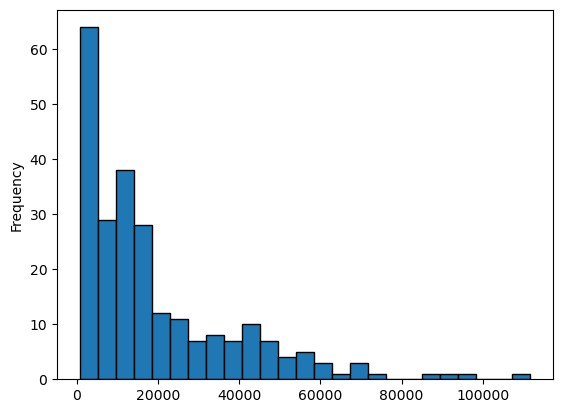

In [36]:
#histogram
gdp_2020['Gdp_Per_Capita'].plot(kind='hist', edgecolor='black', bins=25)

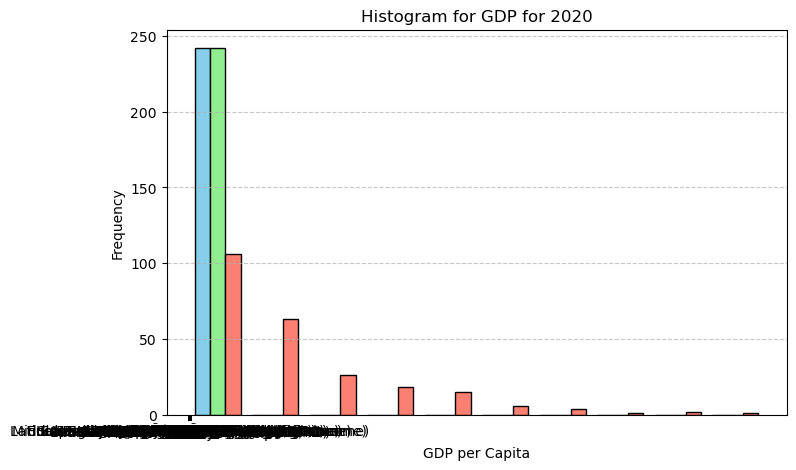

In [38]:
plt.figure(figsize=(8, 5))
plt.hist(gdp_2020, color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black')
plt.title("Histogram for GDP for 2020")
plt.xlabel("GDP per Capita")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='Gdp_Per_Capita', ylabel='Density'>

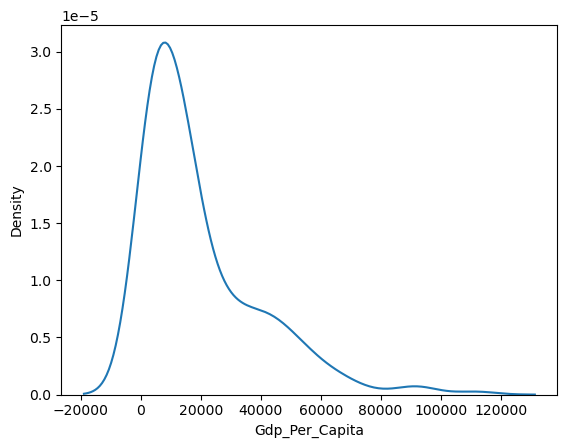

In [47]:
#density plot
sns.kdeplot(data=gdp_2020, x='Gdp_Per_Capita')

<Axes: xlabel='Gdp_Per_Capita'>

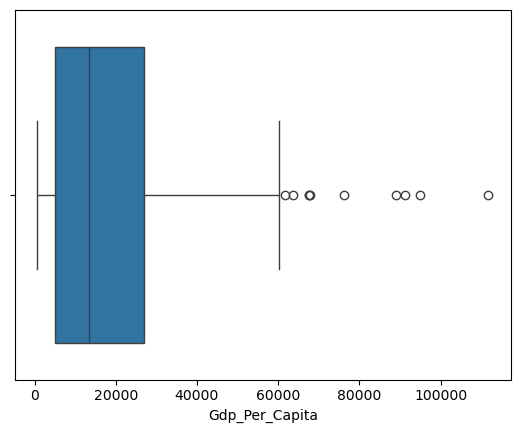

In [51]:
#BoxPlot
sns.boxplot(data=gdp_2020, x='Gdp_Per_Capita')

<Axes: xlabel='Gdp_Per_Capita'>

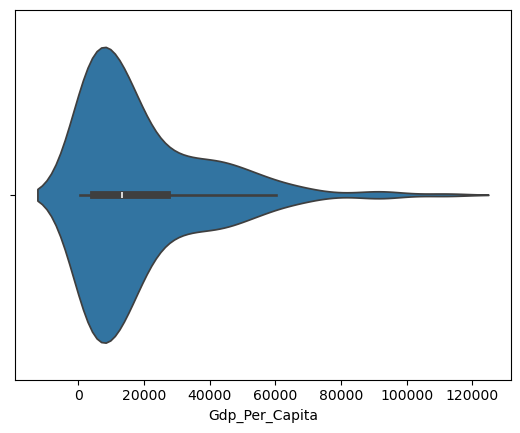

In [53]:
#violinplot
sns.violinplot(data=gdp_2020, x='Gdp_Per_Capita')

<Axes: xlabel='Gdp_Per_Capita'>

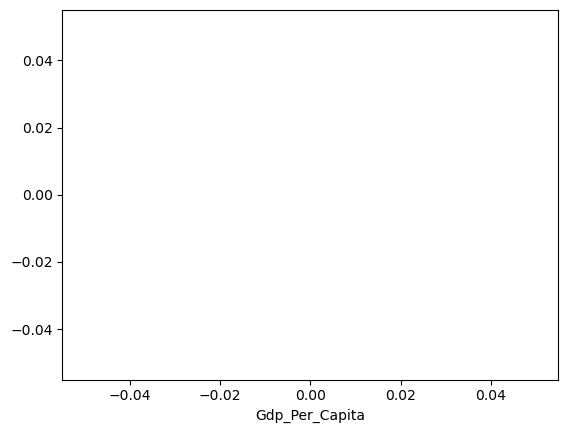

In [76]:
#ScatterPlot
sns.scatterplot(data=gdp_2020, x='Gdp_Per_Capita')

In [ ]:
sns.scatterplot(data=gdp_2020, x='Year', y='Gdp_Per_Capita')

In [ ]:
#from Renuka
# sns.displot(data=gdp_2020['GDP_Per_Capita'],kde=True)
# #Create a density plot using matplotlib
# gdp_2020.GDP_Per_Capita.plot.density(color='green')
# plt.title('Denisty plot for GDP per capita using matplotlib')
# plt.show()
# #Create a density plot using seaborn
# sns.kdeplot(data = gdp_2020, x= 'GDP_Per_Capita', fill = 'skyblue')
# plt.xlabel('GDP Per Capita')
# plt.title('Density plot for GDP per capita using seaborn')
# plt.show()
# # Boxplot using Pandas
# gdp_2020.boxplot(column =['GDP_Per_Capita'], grid = False)
# #plt.xlabel('GDP Per Capita')
# plt.title('Boxplot for GDP per capita')
# plt.show()
# # Boxplot using Seaborn
# sns.boxplot(data =gdp_2020, x='GDP_Per_Capita')
# plt.xlabel('GDP Per Capita')
# plt.title('Boxplot for GDP per capita using Seaborn')
# plt.show()

In [ ]:
sns.boxplot(data=gdp_2020, x='Year', y='Gdp_Per_Capita')

### 9. What was the median GDP per capita value in 2020?

In [ ]:
gdp_2020['Gdp_Per_Capita'].median()

### 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

In [ ]:
gdp_decades=gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]

In [ ]:
gdp_decades

In [ ]:
#box plot
sns.boxplot(data=gdp_decades, x='Year', y='Gdp_Per_Capita', color='red')

In [ ]:
sns.barplot(data=gdp_decades, x='Year', y='Gdp_Per_Capita')

In [ ]:
sns.scatterplot(data=gdp_decades, x='Year', y='Gdp_Per_Capita')

In [ ]:

sns.regplot(data=gdp_decades, x='Year', y='Gdp_Per_Capita')

In [ ]:
#Q10d. Answer: * A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

# Create a scatterplot using plt.scatter(x, y).
plt.scatter(gdp_decades.Year, gdp_decades.GDP_Per_Capita, color = 'seagreen', marker ='*', alpha = 0.4)

# function np.polyfit in NumPy is used to fit a polynomial of a specified degree to a set of data points using the least squares method
# Calculate the equation for the trendline using numpy.polyfi.
trend = np.polyfit(gdp_decades.Year,gdp_decades.GDP_Per_Capita ,1)

# pass trend parameter in To create a polynomial, you can pass an array of coefficients to numpy.poly1d
trend_var = np.poly1d(trend)

# Add the trendline to the plot using plt.plot(x, p(x))
plt.plot(gdp_decades.Year, trend_var(gdp_decades.Year),"r--")

# show the graph
plt.show()

### 11. Which country was the first to have a GDP per capita greater than $100,000?

In [ ]:
gdp_df[gdp_df['Gdp_Per_Capita']>100000].sort_values('Year')

### 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [123]:
gdp_df[gdp_df['Year']==2020].nlargest(1,'Gdp_Per_Capita')#['Country'] #can use serting descing and head()

,Country,Year,Gdp_Per_Capita
4148,Luxembourg,2020,111751.314751


In [108]:
top_country=gdp_df[gdp_df['Country']=='Luxembourg']

<Axes: xlabel='Year'>

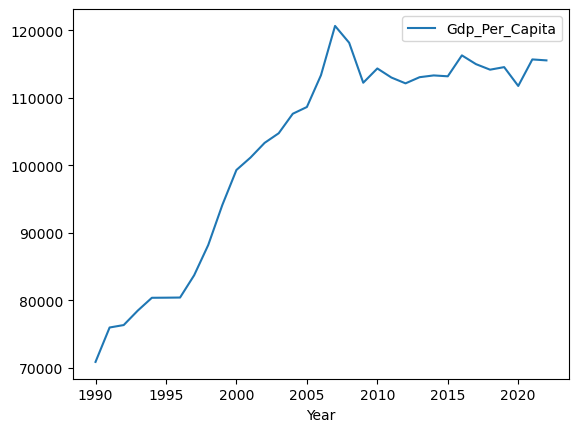

In [114]:
top_country.plot(x='Year',y='Gdp_Per_Capita', kind='line')

### 13 Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [121]:
gdp_df[gdp_df['Year']==2020].nsmallest(1,'Gdp_Per_Capita')#['Country']

,Country,Year,Gdp_Per_Capita
973,Burundi,2020,711.355263


In [127]:
small_country=gdp_df[gdp_df['Country']=='Burundi']

<Axes: xlabel='Year'>

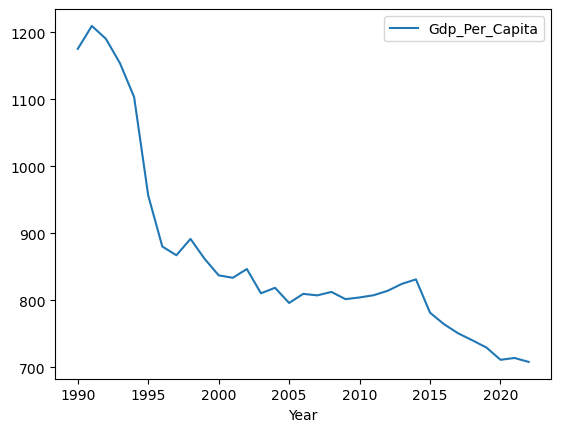

In [129]:
small_country.plot(x='Year', y='Gdp_Per_Capita', kind='line')

### 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [134]:
int_df=pd.read_csv('../data/internet_use.csv', usecols=[0, 1, 2, 3])

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.6,1
1,Afghanistan,2018,16.8,2
2,Afghanistan,2017,13.5,3
3,Afghanistan,2016,11,4
4,Afghanistan,2015,8.26,4
5,Afghanistan,2014,7,4
6,Afghanistan,2013,5.9,4
7,Afghanistan,2012,5.45455,4
8,Afghanistan,2011,5,4
9,Afghanistan,2010,4,4
